# 나이브 베이즈 분류 모형
## 1. 가정
- **독립변수간 조건부 독립**
- 독립변수 D개 $x=(x_1, \cdots, x_D)$
     - 가능도 likelihood $P(x \mid y=k)$: 
         - 모든 $x=(x_1, \cdots, x_D)$에 대한 결합확률(joint probability) $P(x_1, \cdots, x_D \mid y = k)$
     - 나이브 베이즈 분류 모형은 독립변수간 조건부 독립 가정
     - 가능도 갯수: 클래스 k개 x 독립변수 D개
$$P(x_1, \cdots, x_D \mid y = k) = \prod_{d=1}^D P(x_d \mid y=k)$$
- 확률간 크기 비교이므로 분모 필요없음
$$P(y=k \mid x) \propto \prod_{d=1}^D P(x_d \mid y=k)P(y=k)$$

## 2. 모형
## 2.1 가우시안 정규 분포 가능도 모형
- 각 독립변수 $x_d$ & 클래스 k 정규분포 
    - 기댓값 $\mu_{dk}$
    - 표준편차 $\sigma_{dk}^2$
    

- 가능도likelihood    

$$
P(x_d \mid y=k) = \dfrac{1}{\sqrt{2 \pi \sigma_{dk}^2}} \exp \left( - \dfrac{(x_d - \mu_{dk})^2}{2 \sigma_{dk}^2} \right)
$$

## 2.2 베르누이 분포 가능도 모형
$x = (x_1, \cdots, x_D) \rightarrow x_d = 1 | 0$
- 모수 $\mu_{dk}$
- class=k에 속하는 동전이 D개 1set 존재
- 동전 세트 N번 던져서 어느 동전 세트 인지 찾는 것
    - 동전 하나
$$
P(x_d \mid y=k) = \mu_{dk}^{x_d}(1-\mu_{dk})^{1-x_d}
$$
    - 각 동전을 다 곱함(독립이므로)
$$
결합확률 P(x_1, \cdots, x_D \mid y=k) = \prod_{d=1}^D \mu_{dk}^{x_d}(1-\mu_{dk})^{1-x_d}
$$

## 2.3 다항 분포 가능도 모형
- D면체 주사위 K 개 클래스
- 주사위 던져진 결과 -> 1  ~ k 클래스 중 어느 주사위?

$$
x = (1, 4, 0, 5)
$$

$$
P(x_1, \cdots, x_D \mid y=k) \propto \prod_{d=1}^D \mu_{dk}^{x_{dk}}
$$

$$
k나온횟수N_k = \sum_{d=1}^{D}x_{dk}
$$

$$
\sum_{d=1}^D{\mu_{dk}} = 1
$$

- 다항 분포 나이브 베이즈 모형
$$
\log \mu_k = (\log{\mu_{1k}}, \cdots, \log{\mu_{dk}}) 
= \left(\log{\dfrac{N_{1k}}{N_k}}, \cdots, \log{\dfrac{N_{dk}}{N_k}} \right)
$$

## 3. scikit 나이브 베이즈
클래스
- `GaussianNB` 
- `BernoulliNB`
- `MultinomialNB`

메서드
- `classes_`
- `class_count_`
- `class_prior_`: 무조건부 확률분포 $P(Y)$(가우시안 정규분포의 경우만)
- `class_log_prior_`: $logP(Y)$

---

## 3.1 나이브 베이즈 모형: 가우시안 정규분포 
- `theta_`: $\mu$
- `sigma_`: $\sigma^2$


예)D=2, class k=2
$$
\mu_0 = \begin{bmatrix} -2 \\ -2 \end{bmatrix},
\;\;
\Sigma_0 = \begin{bmatrix} 1 & 0.9 \\ 0.9 & 2 \end{bmatrix}
$$

$$
\mu_1 = \begin{bmatrix} 2 \\ 2 \end{bmatrix},
\;\;
\Sigma_0 = \begin{bmatrix} 1.2 & -0.8 \\ -0.8 & 2 \end{bmatrix}
$$

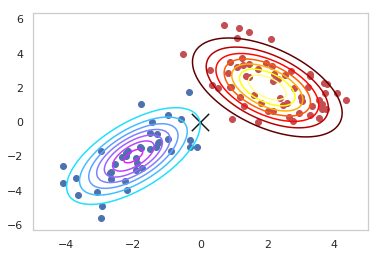

In [163]:
import scipy as sp
np.random.seed(0)
# 다변수 정규분포 모형
rv0 = sp.stats.multivariate_normal([-2, -2],[[1, 0.9], [0.9, 2]])
rv1 = sp.stats.multivariate_normal([2, 2],[[1.2, -0.8], [-0.8, 2]])

# 다변수 정규분포의 표본 추출: Y0과 Y1
x0 = rv0.rvs(40)
x1 = rv1.rvs(60)

# Y0, Y1의 표본 
# x0, x1 -> Y0의 feat x_00, x_01 & x_10, x_11
X = np.vstack([x0, x1])
y = np.hstack([np.zeros(40), np.ones(60)])

xx1 = np.linspace(-5, 5, 100)
xx2 = np.linspace(-5, 5, 100)
XX1, XX2 = np.meshgrid(xx1, xx2)

# Y0, Y1의 feat x1, x2(-5 ~ 5범위) joint plot
plt.grid(False)
plt.contour(XX1, XX2, rv0.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.cool)
plt.contour(XX1, XX2, rv1.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.hot)

# 각 Y0, Y1의 표본
plt.scatter(x0[:, 0], x0[:, 1], marker='o', c='b')
plt.scatter(x1[:, 0], x1[:, 1], marker='o', c='r')

# 분류 대상
x_new = [0, 0]
plt.scatter(x_new[0], x_new[1], c='k', marker='x', s=300, linewidths=50)
plt.show()

- 나이브 베이즈 풀이
    - training -> 모수추정
    - class 별 공분산 행렬 1개, 비대각 성분 0
    - x_new = (x1: 0, x2:0) 분류

- 모수추정

In [164]:
model_norm.sigma_[1]

array([0.22222222, 0.25      , 0.13888889, 0.25      ])

In [165]:
from sklearn.naive_bayes import GaussianNB
model_norm = GaussianNB().fit(X, y)
# y=0
y0_x_theta = model_norm.theta_[0]
y0_x_sigma = model_norm.sigma_[0]

# y=1
y1_x_theta = model_norm.theta_[1]
y1_x_sigma = model_norm.sigma_[1]

# pred
y0_prob = model_norm.predict_proba([x_new])[0][0]
y1_prob = model_norm.predict_proba([x_new])[0][1]

In [166]:
df = pd.DataFrame([model_norm.class_count_, model_norm.class_prior_, \
                   [y0_x_theta, y1_x_theta], \
                   [y0_x_sigma, y1_x_sigma],\
                  [y0_prob, y1_prob]],columns=['y=0', 'y=1'])
df.index = ['count', 'prior', 'theta', 'sigma', 'x_new prob']
df.index.name = 'statistic'
df

,y=0,y=1
statistic,,
count,40,60
prior,0.4,0.6
theta,"[-1.9619764347482291, -2.0059790312439145]","[2.191307007525358, 2.1262671640350645]"
sigma,"[1.0239885417340584, 2.3139049669560405]","[1.2542937124566174, 1.9374254382055554]"
x_new prob,0.484752,0.515248


- 분류과정

In [167]:
# likelihood
y0_llh = \
sp.stats.norm(y0_x_theta[0], np.sqrt(y0_x_sigma)[0]).pdf(x_new[0])*\
sp.stats.norm(y0_x_theta[1], np.sqrt(y0_x_sigma[1])).pdf(x_new[1])

y1_llh = \
sp.stats.norm(y1_x_theta[0], np.sqrt(y1_x_sigma)[0]).pdf(x_new[0])*\
sp.stats.norm(y1_x_theta[1], np.sqrt(y1_x_sigma[1])).pdf(x_new[1])

likelihood = [y0_llh, y1_llh]
likelihood

[0.006615760017637307, 0.00468796559514829]

In [168]:
# posterior
sudo_posterior = likelihood * model_norm.class_prior_
sudo_posterior

array([0.0026463 , 0.00281278])

In [171]:
# posterior 정규화
sudo_posterior / sudo_posterior.sum()

array([0.48475244, 0.51524756])

In [170]:
# pred_prob
(y0_prob, y1_prob)

(0.48475244478519136, 0.5152475552148084)

---

## 3.2 나이브 베이즈 모형: 베르누이 분포
- target & feature 모두 0, 1
- 예) 스팸 필터링
- 코드
    - `feature_count_`: 클래스k에 대해 각 feat이 나온 총 횟수
    - `feature_log_prob_`: 모수의 로그

In [175]:
# 스팸 필터링
# feature는 단어유무
# 필요동전: 스팸(y=1) 스팸(y=0) * feature 단어
# 각각의 mu값이 다른 동전(class 2 * feature 4)
X = np.array([
    [0, 1, 1, 0],
    [1, 1, 1, 1],
    [1, 1, 1, 0],
    [0, 1, 0, 0],
    [0, 0, 0, 1],
    [0, 1, 1, 0],
    [0, 1, 1, 1],
    [1, 0, 1, 0],
    [1, 0, 1, 1],
    [0, 1, 1, 0]])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
x_new = np.array([1, 1, 0, 0])

In [176]:
from sklearn.naive_bayes import BernoulliNB
model_bern = BernoulliNB().fit(X, y)

- 사전확률prior
$$
P(y=k)
$$

In [177]:
# 클래스
print(model_bern.classes_)
# 해당 클래스별 갯수
print(model_bern.class_count_)
# prior
print(np.exp(model_bern.class_log_prior_))

[0 1]
[4. 6.]
[0.4 0.6]


- 모수theta 추정
$$
\mu_{dk}
$$

eg. 스팸 아닌 것 중, x1 키워드 포함 비율

$\mu_{1Y=0} = \dfrac{2}{4} = 0.5$

In [192]:
# 확률 변수 mu_dk의 모수추정
feature_c = model_bern.feature_count_
class_c = np.repeat(model_bern.class_count_[:, None], 4, axis=1)
feature_c /class_c

array([[0.5       , 1.        , 0.75      , 0.25      ],
       [0.33333333, 0.5       , 0.83333333, 0.5       ]])

In [181]:
# 스무딩 적용
theta = np.exp(model_bern.feature_log_prob_)
theta

array([[0.5       , 0.83333333, 0.66666667, 0.33333333],
       [0.375     , 0.5       , 0.75      , 0.5       ]])

- 베르누이 분포 가능도 likelihood
$$
P(x_d \mid y=k) = \mu_{dk}^{x_d}(1-\mu_{dk})^{(1-x_d)}
$$
$$
P(x_1, \cdots, x_D \mid y=k) = \prod_{d=1}^D \mu_{dk}^{x_d}(1-\mu_{dk})^{(1-x_d)}
$$

In [185]:
x_new = np.array([1,1,0,0])
likelihood = ((theta ** x_new) * (1 - theta)**(1-x_new)).prod(axis=1)
likelihood

array([0.09259259, 0.0234375 ])

In [186]:
prior = np.exp(model_bern.class_log_prior_)
prior

array([0.4, 0.6])

- posterior
$$
P(y=k \mid x_1, \cdots, x_D) = \dfrac{likelihood \cdot prior}{P(x_1, \cdots, x_D)}
$$

In [187]:
sudo_posterior = likelihood * prior
sudo_posterior

array([0.03703704, 0.0140625 ])

In [188]:
# 정규화
sudo_posterior / sudo_posterior.sum()

array([0.72480181, 0.27519819])

- prediction

In [153]:
# pred -> 1 확률 높음
model_bern.predict_proba([x_new])

array([[0.72480181, 0.27519819]])

---

### 참고. 스무딩
- 데이터를 추가하여 도메인 지식 확률에 가깝도록 계산
- 예) 동전 던지기라면, 각 $\mu_{dk}$를 0.5에 가깝게 만듦
- $\mu$: `np.exp(model.feature_log_prob_)`

---

## 3.3 나이브 베이즈 모형: 다항분포
- 각 문서 해당 feature 키워드 몇 번 발생

In [193]:
X = np.array([
    [3, 4, 1, 2],
    [3, 5, 1, 1],
    [3, 3, 0, 4],
    [3, 4, 1, 2],
    [1, 2, 1, 4],
    [0, 0, 5, 3],
    [1, 2, 4, 1],
    [1, 1, 4, 2],
    [0, 1, 2, 5],
    [2, 1, 2, 3]])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [194]:
from sklearn.naive_bayes import MultinomialNB
model_mult = MultinomialNB().fit(X, y)

- prior

In [198]:
print(model_mult.classes_)
print(model_mult.class_count_)
print(np.exp(model_mult.class_log_prior_))

[0 1]
[4. 6.]
[0.4 0.6]


- 모수 $\mu$
$$
\mu_{1Y=0} = \dfrac{12}{40} 
$$


In [201]:
feature_count = model_mult.feature_count_
feature_count

array([[12., 16.,  3.,  9.],
       [ 5.,  7., 18., 18.]])

In [226]:
theta = feature_count / np.repeat(feature_count.sum(axis=1)[:, None], 4, axis=1)
theta

array([[0.3       , 0.4       , 0.075     , 0.225     ],
       [0.10416667, 0.14583333, 0.375     , 0.375     ]])

In [237]:
# 스무딩
feature_count_sm =\
np.repeat(feature_count.sum(axis=1)[:, None], 4, axis=1)+\
model_mult.alpha * X.shape[1]

feature_count_sm

array([[44., 44., 44., 44.],
       [52., 52., 52., 52.]])

In [238]:
(feature_count + model_mult.alpha)/feature_count_sm

array([[0.29545455, 0.38636364, 0.09090909, 0.22727273],
       [0.11538462, 0.15384615, 0.36538462, 0.36538462]])

In [244]:
# 스무딩
# 0.25 로 움직임
theta = np.exp(model_mult.feature_log_prob_)
theta

array([[0.29545455, 0.38636364, 0.09090909, 0.22727273],
       [0.11538462, 0.15384615, 0.36538462, 0.36538462]])

- predict

In [243]:
# 키워드가 각 10개씩 포함된 메일
x_new = np.array([10, 10, 10, 10])
model_mult.predict_proba([x_new])

array([[0.38848858, 0.61151142]])

In [255]:
likelihood = (theta ** x_new).prod(axis=1)
sudo_posterior = likelihood * np.exp(model_mult.class_log_prior_)
sudo_posterior / sudo_posterior.sum()

array([0.38848858, 0.61151142])

---

# 예제) 뉴스그룹 분류

In [257]:
from sklearn.datasets import fetch_20newsgroups
news = fetch_20newsgroups(subset="all")
X = news.data
y = news.target

In [262]:
from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model1 = Pipeline([
    ('vect', CountVectorizer()),
    ('model', MultinomialNB())
])
model2 = Pipeline([
    ('vect', TfidfVectorizer()),
    ('model', MultinomialNB())
])
model3 = Pipeline([
    ('vect', TfidfVectorizer(stop_words="english")),
    ('model', MultinomialNB())
])
model4 = Pipeline([
    ('vect', TfidfVectorizer(stop_words="english",
                            token_pattern=r"\b[a-z0-9_\-\.]+[a-z][a-z0-9_\-\.]+\b")),
    ('model', MultinomialNB())
])

In [267]:
from sklearn.model_selection import cross_val_score, KFold

for i, model in enumerate([model1, model2, model3, model4]):
    scores = cross_val_score(model, X, y, cv=5)
    print(("Model{0:d}: Mean score: {1:.3f}").format(i+1, np.mean(scores)))

Model1: Mean score: 0.855
Model2: Mean score: 0.856
Model3: Mean score: 0.883
Model4: Mean score: 0.888
